5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

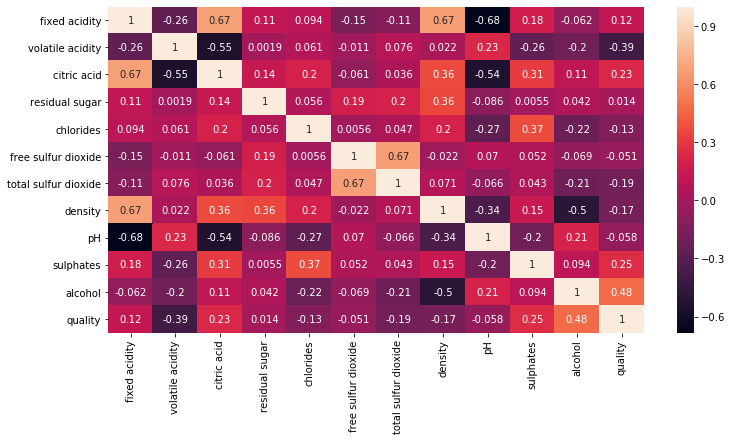

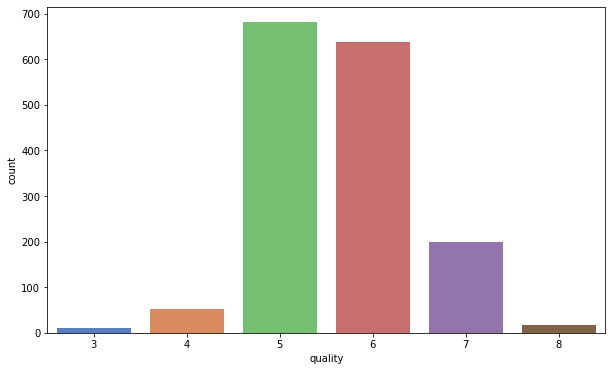

In [1]:
import os
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

  
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';') 

#Correlacao entre os dados, fig 1
plt.figure(figsize=(12, 6))
sb.heatmap(red.corr(), annot=True) #funcao do heatmap para a ocorrencia dos valores e suas relações


#explorando o atributo qualidade, fig 2
plt.figure(figsize=(10, 6)) #tamanho da figura
sb.countplot(red["quality"], palette="muted")
red["quality"].value_counts() #contar quantos vinhos de tal qualidade tem


In [2]:
#Os dados nao estao balanceados e agora? Nao tem problema pois queremos saber se um vinho e bom, muito bom ou ruim.
#Para isso vamos criar uma nova coluna chamada "Taste(Gosto)"
taste = []
for i in red['quality']:
    if i >= 1 and i <= 3:
        taste.append("Bad")
    elif i >= 4 and i <= 7:
        taste.append("Good")
    elif i >= 8 and i <= 10:
        taste.append("Really Good")
red['taste'] = taste

#Agora vamos dividir em (X,y), ou seja em label e caracteristicas
X = red.iloc[:,:11] #a função iloc[:,:] me diz que eu quero todas as linhas e colunas (nesse caso até a 11) como características
y=red['taste'] #minha label e sempre o que eu quero classificar, como o objetivo é saber se um vinho é bom ou não
# de acordo com a qualidade entao Taste é nosso label.


#Normalização das escalas com Standard Scaler
std = StandardScaler()
X_std =std.fit_transform(X)

#dimensionando os dados
print(X_std)

#PCA é um método usado para reduzir o numero de variaveis na sua
# base de dados, extraindo um dado importante numa enorme quantidade 
pca = PCA()
X_pca = pca.fit_transform(X_std)


[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


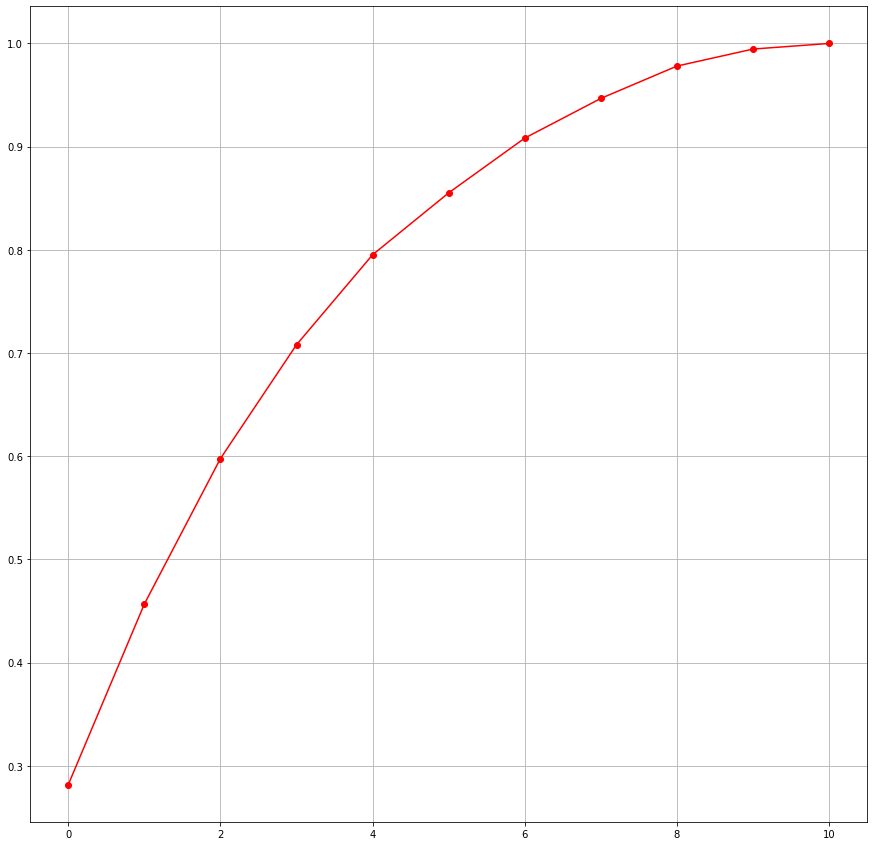

In [3]:
#para achar os principais componentes
plt.figure(figsize=(15,15))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

#vimos que 9 componentes principais atribuem por mais de 95% da variancia da nossa base
#vamos pegar entao os noves primeiros componentes para nossa previzao
pca_new = PCA(n_components=9)
X_pca_new = pca_new.fit_transform(X_std)
X_pca_new

# separando treino e teste
skfold = StratifiedKFold(n_splits=10) # o númeoro 10 é usado como padrão

predicted_y = []
expected_y = []

# partição dos dados
for train_index, test_index in skfold.split(X, y):
    # specific ".loc" syntax for working with dataframes
    X_train, X_test = X_pca_new[train_index], X_pca_new[test_index]
    y_train, y_test = y[train_index], y[test_index]



# KNN

In [4]:
#Algoritmo KNN
knn = KNeighborsClassifier(n_neighbors=3) # K=3 aleatoriamente
knn.fit(X_train, y_train) #treinando
pred_knn = knn.predict(X_test) #previsao dos testes

pred_knn

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [5]:
print('Test accuracy for KNN is:',metrics.accuracy_score(y_test,pred_knn)*100)
print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,pred_knn))
print('\n Classification Report: \n',metrics.classification_report(y_test,pred_knn))

print('Accuracy of K-NN classifier on training set: {:f}'
     .format(knn.score(X_train, y_train)))              
print('Accuracy of K-NN classifier on test set: {:f}'
     .format(knn.score(X_test, y_test)))

Test accuracy for KNN is: 98.74213836477988

Confusion matrix:
 [[  0   1   0]
 [  0 157   0]
 [  0   1   0]]

 Classification Report: 
               precision    recall  f1-score   support

         Bad       0.00      0.00      0.00         1
        Good       0.99      1.00      0.99       157
 Really Good       0.00      0.00      0.00         1

    accuracy                           0.99       159
   macro avg       0.33      0.33      0.33       159
weighted avg       0.98      0.99      0.98       159

Accuracy of K-NN classifier on training set: 0.981944
Accuracy of K-NN classifier on test set: 0.987421


c:\users\natalia\desktop\summer2020\tutorial-env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Arvore de Decisão

In [6]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

pred_clf = clf.predict(X_test) #previsao dos testes

pred_clf

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [7]:
print('Test accuracy for Decision Tree is:',metrics.accuracy_score(y_test,pred_clf)*100)
print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,pred_clf))
print('\n Classification Report: \n',metrics.classification_report(y_test,pred_clf))

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Test accuracy for Decision Tree is: 98.74213836477988

Confusion matrix:
 [[  0   1   0]
 [  0 157   0]
 [  0   1   0]]

 Classification Report: 
               precision    recall  f1-score   support

         Bad       0.00      0.00      0.00         1
        Good       0.99      1.00      0.99       157
 Really Good       0.00      0.00      0.00         1

    accuracy                           0.99       159
   macro avg       0.33      0.33      0.33       159
weighted avg       0.98      0.99      0.98       159

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.99


c:\users\natalia\desktop\summer2020\tutorial-env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
